In [1]:
%matplotlib inline

In [2]:
import torchvision
import torch
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from torchvision import transforms

In [4]:
dir(torchvision.models.detection)

['FasterRCNN',
 'KeypointRCNN',
 'MaskRCNN',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'backbone_utils',
 'faster_rcnn',
 'fasterrcnn_resnet50_fpn',
 'generalized_rcnn',
 'image_list',
 'keypoint_rcnn',
 'keypointrcnn_resnet50_fpn',
 'mask_rcnn',
 'maskrcnn_resnet50_fpn',
 'roi_heads',
 'rpn',
 'transform']

In [5]:
model=torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

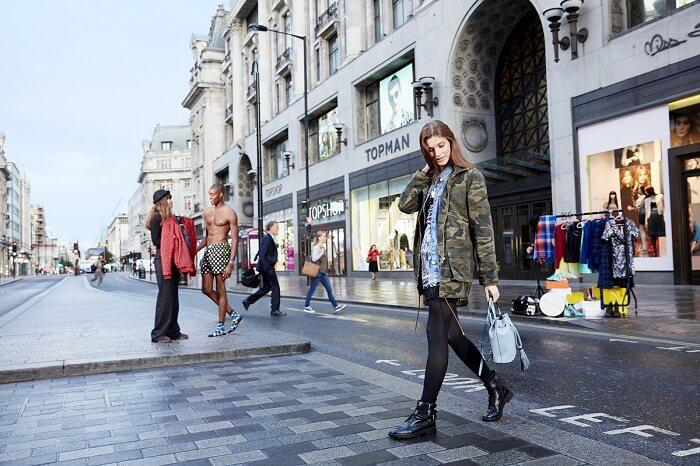

In [6]:
image=Image.open("hog_test2.jpg")
image

In [7]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
       

In [8]:
transform = transforms.Compose( [ transforms.ToTensor() ] )

In [9]:
image_tensor = transform(image)
batch_tensor = torch.unsqueeze(image_tensor, 0)
image_tensor.size()

torch.Size([3, 466, 700])

In [10]:
predictions=model(batch_tensor)

In [11]:
predictions

[{'boxes': tensor([[391.9158, 117.0969, 510.6577, 437.9690],
          [299.6121, 230.1371, 342.4196, 313.7853],
          [148.4543, 189.8185, 198.6336, 341.3422],
          [196.9519, 181.7436, 240.7352, 336.4841],
          [239.5916, 219.9033, 285.3677, 316.7357],
          [366.0573, 243.8970, 380.1732, 279.2343],
          [483.3387, 301.1283, 530.5262, 370.4234],
          [301.1702, 255.7810, 320.2103, 278.3951],
          [ 10.9713, 242.0437,  17.4718, 255.4156],
          [398.6228, 231.7132, 410.5949, 268.9998],
          [ 90.6753, 263.2141, 104.6704, 288.0192],
          [638.6789, 185.0132, 664.5766, 260.7268],
          [238.5768, 263.8281, 262.1383, 287.7312],
          [137.0660, 258.3707, 145.3975, 279.2243],
          [177.8015, 215.5168, 196.6772, 276.5864],
          [603.2566, 191.2656, 619.8987, 210.7780],
          [582.0419, 219.3015, 609.3718, 271.3873],
          [510.5615, 293.7500, 537.8623, 315.4917],
          [403.4320, 245.1260, 412.6809, 269.0321],
   

In [ ]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [ ]:
draw=ImageDraw.Draw(image)
for (b, l) in zip(predictions[0]['boxes'], predictions[0]['labels']):
    draw.rectangle((b[0],b[1],b[2],b[3]), width=2)
    draw.text((b[0],b[1]),COCO_INSTANCE_CATEGORY_NAMES[l],
              font=ImageFont.truetype("Arial", size=int(image.size[1]/20)))
image